# $\mathrm{C_2H_5CHO}$ (Prpionaldehyde)

In [26]:
using Pkg 
Pkg.activate("../")

  Activating project at `~/gitrepos/activepure/Photolysis.jl/mcm`


In [27]:
using Plots, MLPlotRecipes
using HDF5
using Tables, DataFrames, CSV
using MLJ, MLJGaussianProcesses
using StatsBase 
using KernelFunctions
using ParameterHandling

In [28]:
include("./utils.jl")

filter_outliers (generic function with 1 method)

In [29]:
# load in spectrometer data
hr4000_df = CSV.File("../hr4000_wavelengths.txt") |> DataFrame ; 

In [30]:
reaction = "C₂H₅CHO → C₂H₅ + HCO"

"C₂H₅CHO → C₂H₅ + HCO"

In [42]:
# taken from: http://chmlin9.leeds.ac.uk/MCMv3.3.1/parameters/photolysis/C2H5CHO/c2h5cho_chen&zhu01_qy_298.txt 

data = [
280	0.85
285	1.01
290	0.95
295	0.98
300	0.92
305	0.95
310	0.98
315	0.04
320	0.028
325	0.021
330	0.023
    ]

λ = data[:,1]
Φ = data[:,2]
T = [298.0 for _ ∈ 1:size(λ,1)]

11-element Vector{Float64}:
 298.0
 298.0
 298.0
 298.0
 298.0
 298.0
 298.0
 298.0
 298.0
 298.0
 298.0

# Model Evaluation

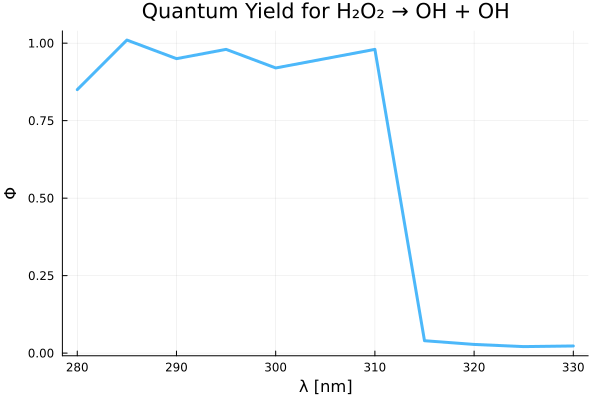

In [43]:
#λ = hr4000_df.λ
# Φ = ones(size(λ))

idxs = [idx for idx ∈ 1:size(λ,1) if λ[idx] < 230.0]
Φ[idxs] .= 0.0

p = plot(
    λ,
    Φ,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for H₂O₂ → OH + OH"
)